# ITI105 Machine Learning Project

Team members:
* Lye Suh Jeng (7487427Y)
* Lee Li Neng (6203055B)
* Lim Chan Boon (9704541M)
---
Project Problem: 4 (a) as in suggested project:
* The success of the song can often been measured by whether the song is on the Hit Chart such as Billboard Hot 100. It is important for music labels to know what makes a song successful so that they can focus their budget on making songs that has the highest chance of being successful.
---
We want to solve the problem statement by using the follow steps:
1.   Load dataset
2.   Discover & visualize data to gain insights
3.   Prepare data
4.   Feature scaling
6.   Feature reduction
5.   Split data into train and test datasets
6.   Train, fine tune and evaluate models
7.   Compare performance of models
8.   Deploy the model

# (1) Gather and Load dataset

In [1]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

df = pd.read_csv('https://raw.githubusercontent.com/dy018/project105/main/song_data.csv')

# (2) Discover & visualize data to gain insights

In [2]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [4]:
# Drop song_name since it's not feature to determine song popularity
df.drop(['song_name'], axis=1, inplace=True)

print(">>> Display first 5 records:\n")
df.head()

>>> Display first 5 records:



,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [5]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

,0
audio_mode,2
time_signature,5
key,12
song_popularity,101
danceability,849
energy,1132
speechiness,1224
audio_valence,1246
liveness,1425
acousticness,3209


* audio_mode, time_signature and key most likely are categorical features. The rest are numeric features

In [6]:
# Study each columns in df
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [7]:
df['time_signature'].unique()

array([4, 3, 1, 5, 0])

## 2.2) Data visulisation using histogram

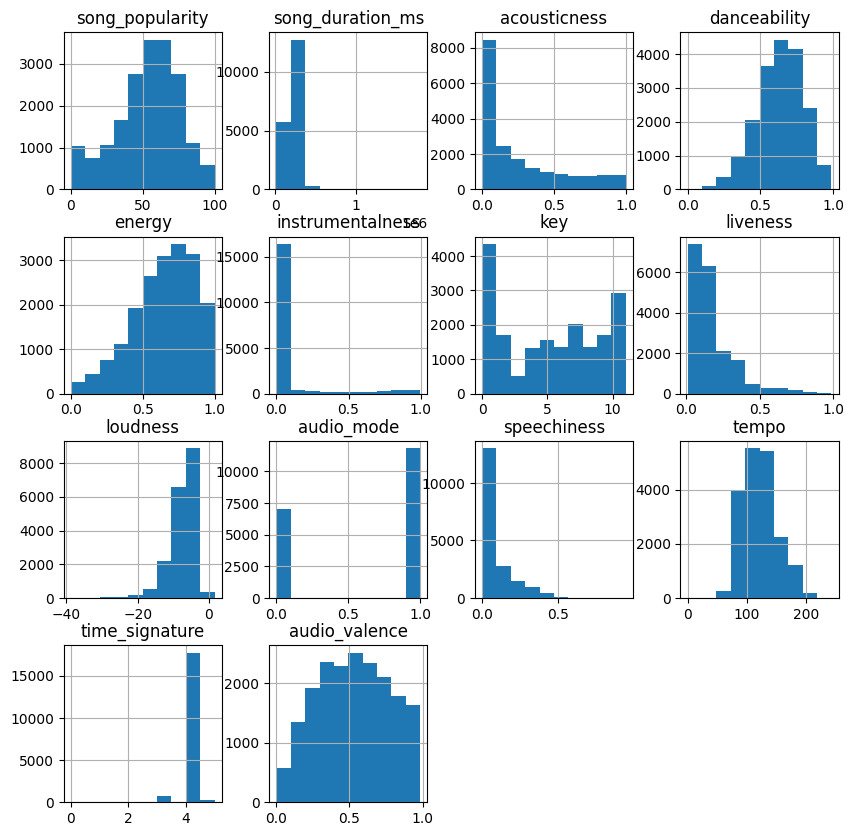

In [8]:
# Plot histograms for df to see data distribution

import matplotlib.pyplot as plt
df.hist(figsize=(10,10))
plt.show()


### Notes:
* Target = Song_popularity (Popularity score from 0 to 100 with 100 as the most popular song).
* Base on the histogram, the song_popularity is well spreaded bell curve from 0 to 100.
* Instrumentalness has small data variance and may not be good feature to determine song_popularity

## 2.3) Data visulisation using boxplot

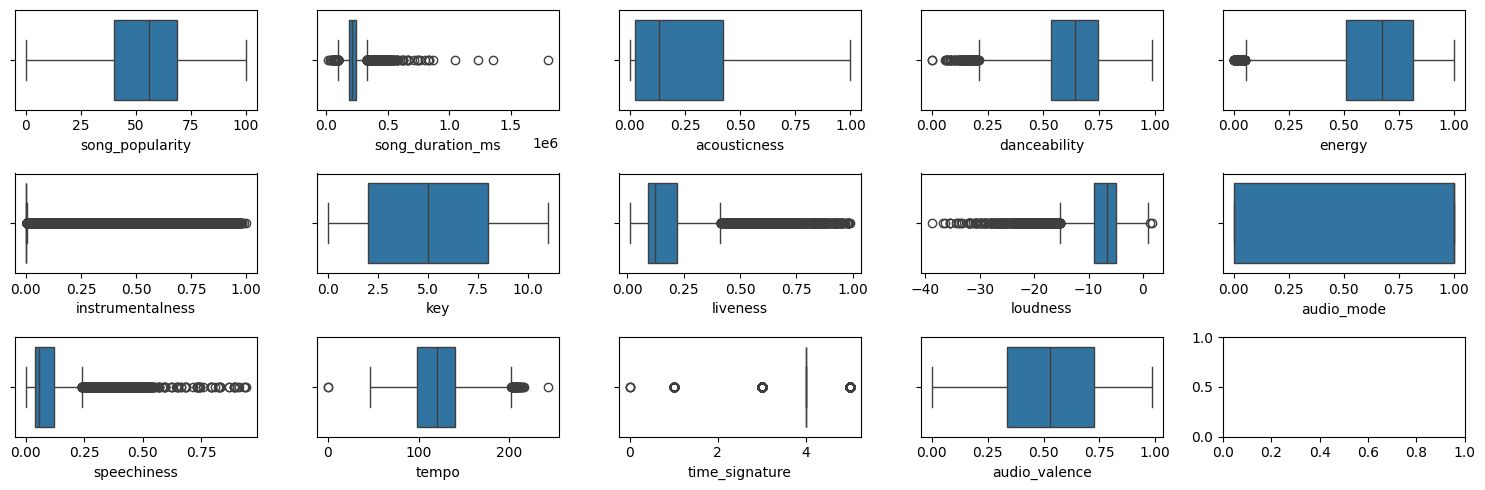

In [9]:
# Plot boxplot for numeric features
fig, axs = plt.subplots(3, 5, figsize=(15, 5))

for i, feature in enumerate(df.columns):
    sns.boxplot(x=df[feature], ax=axs[i // 5, i % 5])

# Adjust the layout so that the plots do not overlap
plt.tight_layout()

# Show the plot
plt.show()


### **Observation from boxplots:**
* song_duration_ms, danceability, energy, liveness, loudness and speechiness and tempo seem to have outliers.
* instrumentalness can't be plot using boxplot, highly suspect that it's not a feature that is useful to determine song_popularity.

## 2.4) Data visulisation using correlation matrix

In [10]:
corr_matrix = df.corr()
target_correlation = corr_matrix['song_popularity'].sort_values(ascending=False)
print(target_correlation)

song_popularity     1.000000
danceability        0.104290
loudness            0.099442
time_signature      0.034983
speechiness         0.021479
energy              0.001365
audio_mode         -0.004969
key                -0.013160
song_duration_ms   -0.018899
tempo              -0.022672
liveness           -0.038937
audio_valence      -0.052895
acousticness       -0.065181
instrumentalness   -0.130907
Name: song_popularity, dtype: float64


### Observation:
* Top 4 numeric features that have higher correlation to song_popularity are: danceability, loudness, speechiness, energy

                                         Correlation Matrix                                         


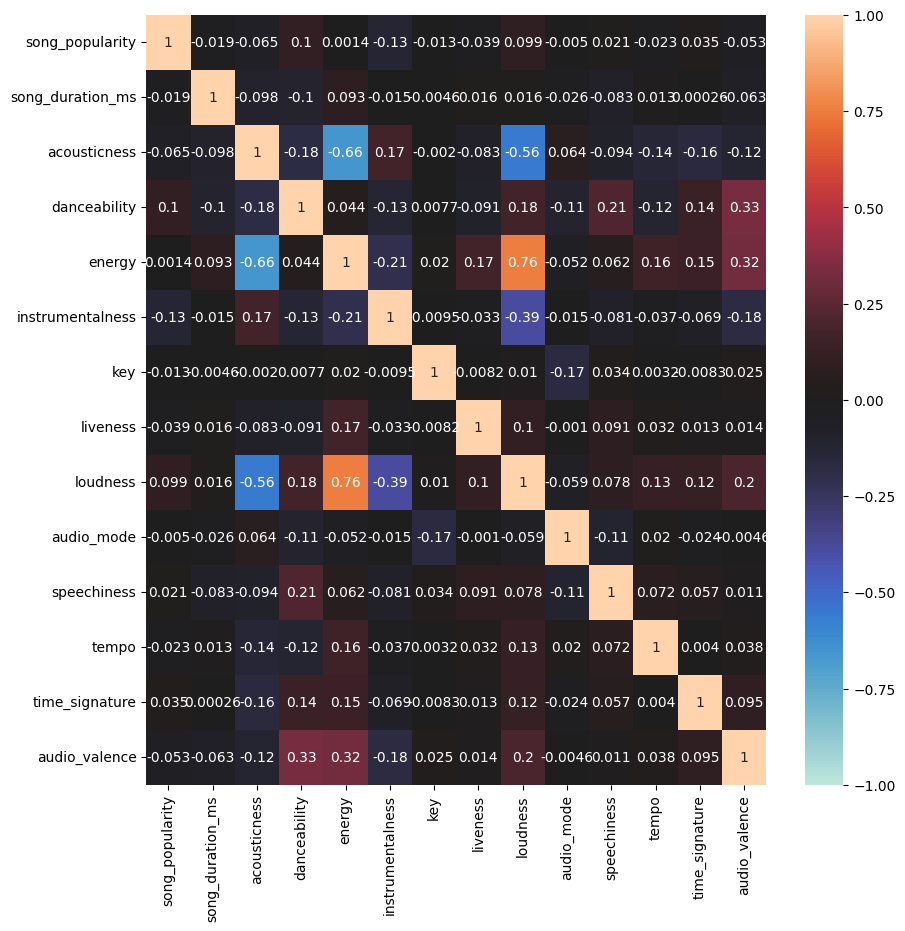

In [11]:
print('Correlation Matrix'.center(100))
plt.figure(figsize=[10,10])
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

### Obeservations:
* there are multi-colinearity between the following features:
** danceability and audio_valence (0.33)
** loudness and energy (0.76)

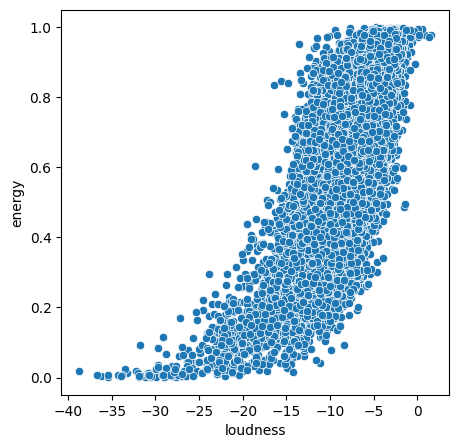

In [12]:
# plot scatterplot for loundnes vs energy to visualize their colinearlity.
plt.figure(figsize=[5,5])
sns.scatterplot(x=df['loudness'],y=df['energy'])

# Show the plot
plt.show()

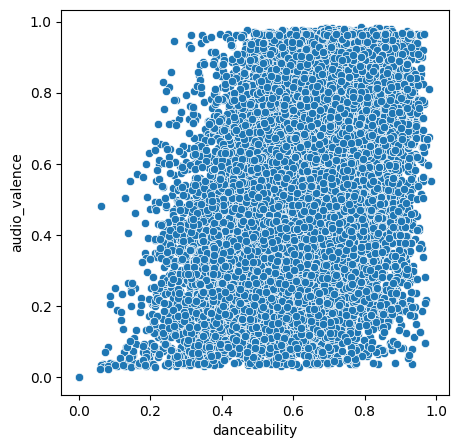

In [13]:
# plot scatterplot for danceability and audio_valence  to visualize their colinearlity.
plt.figure(figsize=[5,5])
sns.scatterplot(x=df['danceability'],y=df['audio_valence'])

# Show the plot
plt.show()

# (3) Data Preparation


## (3) Remove outliners

In [45]:
# backup df
df1 = df.copy()
df1.shape

(18835, 14)

In [46]:
# remove outliners in Tempo, danceability, energy featuers that are outside 40% of IQR for both Q1 and Q3 ends respectively
features_w_outliners = ['tempo', 'danceability', 'energy']

for i in features_w_outliners:
  Q1 = df1[i].quantile(0.25)
  Q3 = df1[i].quantile(0.75)
  IQR = Q3 - Q1
  df1 = df1[df1[i] <= (Q3+(1.4*IQR))]
  df1 = df1[df1[i] >= (Q1-(1.4*IQR))]
  df1 = df1.reset_index(drop=True)

print(">>> df's shape after removing outliers:\n", df1.shape)
print(">>> Number of outliers that was removed\n", df.shape[0] - df1.shape[0])

>>> df's shape after removing outliers:
 (18314, 14)
>>> Number of outliers that was removed
 521


In [47]:
# Backup original df
df2 = df1.copy()
df2.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [48]:
# song_popularity is target. The rest of columns are features
# Get list of features from df
features = df2.columns[1:].tolist()

# put features into 2 types: categorical features and numeric features
category_features = ['audio_mode', 'time_signature', 'key']
numeric_features = [feature for feature in features if feature not in category_features]
print(">>> Categorical features are:", category_features)
print(">>> Numeric features are:", numeric_features)

>>> Categorical features are: ['audio_mode', 'time_signature', 'key']
>>> Numeric features are: ['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']


In [49]:
# Convert categorical features to numeric using dummy encoding
df_numeric = df2[numeric_features]
df_category = df2[category_features]

for feature in category_features:
    dummies = pd.get_dummies(df_category[feature], prefix=feature)
    df_category = pd.concat([df_category, dummies], axis=1)
    df_category.drop(feature, axis=1, inplace=True)

print(">>> df_category's shape using dummy encoding:", df_category.shape)
print(">>> Columns in new df_cotegory:\n", df_category.columns)
print(">>> First 5 records in new df2:\n")
df_category.head()

>>> df_category's shape using dummy encoding: (18314, 19)
>>> Columns in new df_cotegory:
 Index(['audio_mode_0', 'audio_mode_1', 'time_signature_0', 'time_signature_1',
       'time_signature_3', 'time_signature_4', 'time_signature_5', 'key_0',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11'],
      dtype='object')
>>> First 5 records in new df2:



,audio_mode_0,audio_mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
1,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
2,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [50]:
print(">>> df_numeric's shape is:", df_numeric.shape)
print(">>> Columns in new df:\n", df_numeric.columns)
print(">>> First 5 records in new df2:\n")
df_numeric.head()

>>> df_numeric's shape is: (18314, 10)
>>> Columns in new df:
 Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'audio_valence'],
      dtype='object')
>>> First 5 records in new df2:



,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
0,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.060,0.474
1,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,105.256,0.370
2,231733,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,123.881,0.324
3,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,122.444,0.198
4,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,172.011,0.574


## (3)(a) Handle imbalanced datasets

In [51]:
Q1_df = df2[df2['song_popularity'] <= 25]
Q2_df = df2[(df2['song_popularity'] > 25) & (df2['song_popularity'] <= 50)]
Q3_df = df2[(df2['song_popularity'] > 51) & (df2['song_popularity'] <= 75)]
Q4_df = df2[(df2['song_popularity'] > 75) & (df2['song_popularity'] <= 100)]

Q1_length = len(Q1_df)
Q2_length = len(Q2_df)
Q3_length = len(Q3_df)
Q4_length = len(Q4_df)
print(">>> Number of records in Q1:", Q1_length)
print(">>> Number of records in Q2:", Q2_length)
print(">>> Number of records in Q3:", Q3_length)
print(">>> Number of records in Q4:", Q4_length)

>>> Number of records in Q1: 2316
>>> Number of records in Q2: 5030
>>> Number of records in Q3: 8063
>>> Number of records in Q4: 2563


In [52]:
# determine which df has highest number of data
df_lengths = {
    'Q1_df': Q1_df,
    'Q2_df': Q2_df,
    'Q3_df': Q3_df,
    'Q4_df': Q4_df
}

max_df_name = max(df_lengths, key=lambda k: len(df_lengths[k]))
max_df = df_lengths[max_df_name]
print(f">>> The DataFrame with the maximum number of records is: {max_df_name} with {len(max_df)} records")


>>> The DataFrame with the maximum number of records is: Q3_df with 8063 records


In [53]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Upsample 3 df to be the same length with max_df
def upsample_df(tmp_df, max_length):
  df_upsampled = resample(tmp_df,
                          replace=True,     # sample with replacement
                          n_samples=max_length,    # to match majority class
                          random_state=40)  # reproducible results
  return df_upsampled

Q1_df_upsampled = upsample_df(Q1_df, len(max_df))
Q2_df_upsampled = upsample_df(Q2_df, len(max_df))
Q4_df_upsampled = upsample_df(Q4_df, len(max_df))

In [54]:
print(">>> Number of records in Q1_df_upsampled:", len(Q1_df_upsampled))
print(">>> Number of records in Q2_df_upsampled:", len(Q2_df_upsampled))
print(">>> Number of records in Q4_df_upsampled:", len(Q4_df_upsampled))


>>> Number of records in Q1_df_upsampled: 8063
>>> Number of records in Q2_df_upsampled: 8063
>>> Number of records in Q4_df_upsampled: 8063


In [55]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([Q1_df_upsampled, Q2_df_upsampled, Q3_df, Q4_df_upsampled])

In [56]:
print(">>> New DF's shape after upsizing minority Quarters is:", df_upsampled.shape)

>>> New DF's shape after upsizing minority Quarters is: (32252, 14)


In [57]:
df_upsampled.head(10)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
17948,23,233832,0.029300,0.726,0.769,0.010100,6,0.1040,-5.043,1,0.1230,97.985,4,0.733
16211,22,214935,0.000509,0.501,0.670,0.869000,11,0.0928,-7.683,0,0.0589,146.204,4,0.504
17590,9,217142,0.014500,0.886,0.780,0.000003,10,0.0453,-10.780,0,0.1020,124.778,4,0.600
10586,15,246320,0.491000,0.791,0.557,0.000000,2,0.1090,-4.453,1,0.0547,111.127,4,0.530
14339,2,170501,0.013300,0.684,0.904,0.000003,4,0.0711,-6.916,0,0.0669,119.993,4,0.914
5877,0,324000,0.000348,0.543,0.949,0.146000,5,0.0955,-2.639,0,0.2030,140.006,4,0.300
16500,19,308973,0.880000,0.474,0.263,0.000044,8,0.1230,-10.684,1,0.0336,168.683,4,0.458
3968,12,162000,0.535000,0.793,0.900,0.000000,11,0.7370,-3.159,0,0.0909,101.521,4,0.429
16876,18,217200,0.326000,0.622,0.854,0.000038,1,0.5360,-5.188,1,0.1040,176.188,4,0.904
13387,8,186333,0.013700,0.661,0.874,0.000002,7,0.3850,-3.326,0,0.0469,127.968,4,0.428


## 3b) Split features into numeric and categorical features

In [58]:
# song_popularity is target. The rest of columns are features
# Get list of features from df
features = df_upsampled.columns[1:].tolist()

# put features into 2 types: categorical features and numeric features
category_features = ['audio_mode', 'time_signature', 'key']
numeric_features = [feature for feature in features if feature not in category_features]
print(">>> Categorical features are:", category_features)
print(">>> Numeric features are:", numeric_features)

>>> Categorical features are: ['audio_mode', 'time_signature', 'key']
>>> Numeric features are: ['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']


In [59]:
# define target
Y = df_upsampled['song_popularity']
Y.shape

(32252,)

In [60]:
X = df_upsampled.drop(['song_popularity'], axis=1)
X.shape

(32252, 13)

In [61]:
X.columns

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence'],
      dtype='object')

In [62]:
X = X.drop(['audio_mode', 'key', 'time_signature'], axis=1)
print(X.shape)
X.head()

(32252, 10)


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence
17948,233832,0.029300,0.726,0.769,0.010100,0.1040,-5.043,0.1230,97.985,0.733
16211,214935,0.000509,0.501,0.670,0.869000,0.0928,-7.683,0.0589,146.204,0.504
17590,217142,0.014500,0.886,0.780,0.000003,0.0453,-10.780,0.1020,124.778,0.600
10586,246320,0.491000,0.791,0.557,0.000000,0.1090,-4.453,0.0547,111.127,0.530
14339,170501,0.013300,0.684,0.904,0.000003,0.0711,-6.916,0.0669,119.993,0.914


# 4) Split data into training and testing datasets

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=40)
X_train.reset_index(drop=True,inplace=True)

print(">>> Size of trainig set: ", X_train.shape)
print(">>> Size of testing set: ", X_test.shape)

>>> Size of trainig set:  (25801, 10)
>>> Size of testing set:  (6451, 10)


In [64]:
# Scale data
min_max_scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
min_max_scaled_data = min_max_scaler.fit(X_train)

# Transform datasets
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [66]:
import pickle

# Save the pipeline to a pickle file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(min_max_scaler, file)

# 6.  Train, fine tune, and evaluate model's performance

## Model Evaluation Functions

In [67]:
# calculates r2_score
def cal_r2(y_true, y_pred):
  r2 = r2_score(y_true, y_pred)
  return r2

# Calculates adjusted_r2
def cal_adj_r2(x_df, r2):
  number_variables = x_df[1] - 1
  adjusted_r2 = 1 - ((1-r2) * (x_df[0]-1)) / (x_df[0] - number_variables -1)
  return adjusted_r2

def cal_mse(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  return mse

def cal_performance(x_train_shape, x_test_shape, y_train, y_train_pred, y_test, y_test_pred):
  r2_train = cal_r2(y_train, y_train_pred)
  r2_test = cal_r2(y_test, y_test_pred)
  adj_r2_train = cal_adj_r2(x_train_shape, r2_train)
  adj_r2_test = cal_adj_r2(x_test_shape, r2_test)
  mse_train = cal_mse(y_train, y_train_pred)
  mse_test = cal_mse(y_test, y_test_pred)

  performance_dict = {
    'r2_train': r2_train,
    'r2_test': r2_test,
    'adj_r2_train': adj_r2_train,
    'adj_r2_test': adj_r2_test,
    'mse_train': mse_train,
    'mse_test': mse_test
    }
  return performance_dict

## 6g) Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest Regressor
rf = RandomForestRegressor(random_state=40)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100,200, 250],
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions
rf_pred_train = best_rf.predict(X_train)
rf_pred_test = best_rf.predict(X_test)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 250}


In [69]:
# Evaluate the model
rf_performance = cal_performance(X_train.shape, X_test.shape, y_train, rf_pred_train, y_test, rf_pred_test)
print(rf_performance)

{'r2_train': 0.9688484001812477, 'r2_test': 0.8627364455961476, 'adj_r2_train': 0.9688375295520217, 'adj_r2_test': 0.8625446474297706, 'mse_train': 23.845086681145844, 'mse_test': 105.33505157500393}


In [70]:
# convert dictionary to dataframe
rf_df = pd.DataFrame.from_dict(rf_performance, orient='index', columns=['RF'])

print(">>> Model performance:\n")
rf_df

>>> Model performance:



,RF
r2_train,0.968848
r2_test,0.862736
adj_r2_train,0.968838
adj_r2_test,0.862545
mse_train,23.845087
mse_test,105.335052


In [ ]:
# dump models

import pickle

# Save the trained model to a pickle file
with open('best_rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

# Save the trained model to a pickle file
with open('best_svr.pkl', 'wb') as f:
    pickle.dump(best_svr, f)

In [ ]:
# Save the trained model to a pickle file
with open('best_gbr.pkl', 'wb') as f:
    pickle.dump(best_gbr, f)

# 7) Validate using test data on Best Model

## 7a) Manually check some test data

### Manually check test data using Random Forest Model (RF)

In [ ]:
print(y_test[0:20].values)
print(rf_pred_test[:20])

[78  0 33 77 23 81 76 91 73 26 17 78 21  4  0 42 64 34 20 61]
[77.91958874 11.81574405 36.86066865 67.5915175  26.37464286 77.28807666
 75.63217262 91.         66.26120851 35.39400794 18.73876389 65.93474206
 22.05497421 44.38338997  6.51010823 42.60745437 41.42182738 34.79417767
 23.21584524 45.44916613]


**Observation:**
* At one glace, the predicted song_popularity score is close to real song_popularity score.

## 7b) Validation using histogram


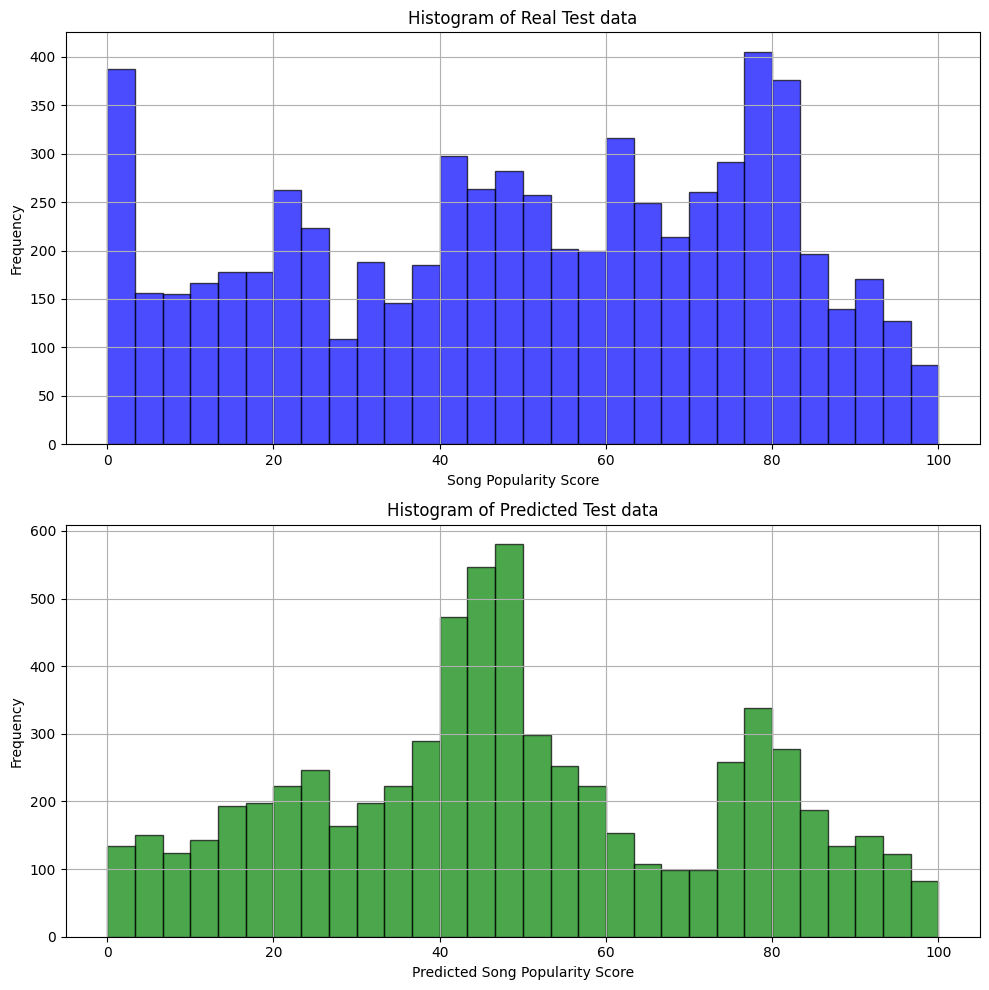

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot the first histogram on the first subplot
ax1.hist(y_test, bins=30, color='blue', alpha=0.7, edgecolor='black')
ax1.set_title('Histogram of Real Test data')
ax1.set_xlabel('Song Popularity Score')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# Plot the second histogram on the second subplot
ax2.hist(rf_pred_test, bins=30, color='green', alpha=0.7, edgecolor='black')
ax2.set_title('Histogram of Predicted Test data')
ax2.set_xlabel('Predicted Song Popularity Score')
ax2.set_ylabel('Frequency')
ax2.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


**Observations**:
- Many prediction happen in roughly 50% song_popularity score.

## 7c) Validation using Residual Plot for 2 best models

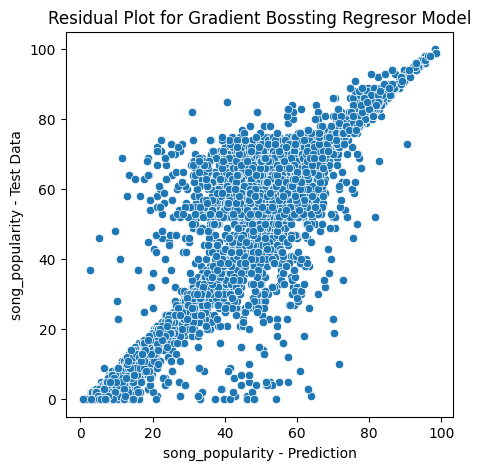

In [ ]:
# plot scatterplot for Residual Plot for GBR(Gradient Boosting Regressor) Model
plt.figure(figsize=[5,5])
sns.scatterplot(x=gbr_pred_test ,y=y_test)

# Show the plot
plt.title("Residual Plot for Gradient Bossting Regresor Model")
plt.xlabel('song_popularity - Prediction')
plt.ylabel('song_popularity - Test Data')
plt.show()

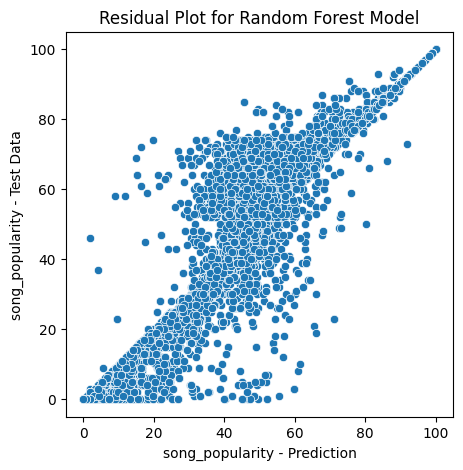

In [ ]:
# plot scatterplot for Residual Plot for Random Forest Model
plt.figure(figsize=[5,5])
sns.scatterplot(x=rf_pred_test ,y=y_test)

# Show the plot
plt.title("Residual Plot for Random Forest Model")
plt.xlabel('song_popularity - Prediction')
plt.ylabel('song_popularity - Test Data')
plt.show()

# 7. Deployment

* Refer to another colab notebook: Deploy_19_105_ML_project_song_best.ipynb

In [71]:
# dump models

import pickle

# Save the trained model to a pickle file
with open('best_rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)